In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
%matplotlib inline

In [2]:
def direction(a): # function determing the direction of the movement and then adding the distance also.
    if a == 1:  # North
        cord = pd.DataFrame([[0, 10, 10]], columns=list('XYD'))
    elif a == 2:  # South
        cord = pd.DataFrame([[0, -10, 10]], columns=list('XYD'))
    elif a == 3:  # East
        cord = pd.DataFrame([[10, 0, 10]], columns=list('XYD'))
    elif a == 4:  # West
        cord = pd.DataFrame([[-10, 0, 10]], columns=list('XYD'))
    else:
        raise ValueError("Enter Number between 1-4")
    return cord

In [3]:
initial_cordinate = pd.DataFrame([[0, 0, 0]], columns=list('XYD')) #initial position

In [4]:
def time():
    ap = pd.DataFrame()
    cordinate = initial_cordinate
    for i in range(1, 500):
        number = random.randint(1, 4)
        cordinate = cordinate+direction(number)
        data = cordinate
        k = data.iloc[:, :2]
        l = k.sum(axis=1)  # As the equation x+y=10, calculating the sum and if the sum is 10 than i am at my food
        if l[0] == 10:
            ap = ap.append(data)
            cordinate=initial_cordinate
        else:
            pass
    return ap

In [5]:
t = pd.DataFrame()

In [6]:
for a in range(0, 500):
    y = time()
    if y.empty:
        pass
    else:
        y = y.iloc[:, 2]
        y = pd.Series(y.mean())
        t = t.append(y/10, ignore_index=True)
        a = a+1

In [7]:
t.columns = ['Time']

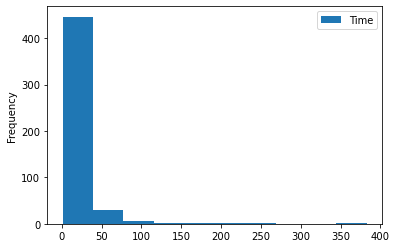

In [8]:
t.plot.hist()

In [9]:
t.mean() # Answer: Average time secs

Time    18.070981
dtype: float64

In [10]:
t.std() # Standard Deviation

Time    26.846922
dtype: float64

In [11]:
CI_u, CI_l = (t.mean()+1.96*((t.std())/np.sqrt(len(t)))
              ), (t.mean()-1.96*((t.std())/np.sqrt(len(t))))

In [12]:
CI_u, CI_l  # confidence Interval Upper and Lower at 95% level

(Time    20.457871
 dtype: float64,
 Time    15.684091
 dtype: float64)

In [13]:
t.min() # Minimum time 

Time    1.0
dtype: float64

In [14]:
t.max() # Maximum time

Time    383.0
dtype: float64